In [1]:
import pandas, warnings

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  pieargs["ylabel"] = ""
  plot = result.plot.pie(**pieargs);

def lineplot(result, **lineargs):
  plot = result.plot.line(**lineargs)
  plot.set_xticks(result.index);

In [3]:
url = "clean_data.csv"

tanggal = ["order_date"]

origin = pandas.read_table(url, sep=",", parse_dates=tanggal)

origin.iloc[:5, :5]

,order_id,order_status,customer,order_date,order_quantity
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6
1,293,Order Finished,Barry French,2012-10-01,49
2,483,Order Finished,Clay Rozendal,2011-07-10,30
3,515,Order Finished,Carlos Soltero,2010-08-28,19
4,613,Order Finished,Carl Jackson,2011-06-17,12


In [4]:
origin.iloc[:5, 5:]

,sales,discount,discount_value,product_category,product_sub_category
0,523080,0.04,20923,Office Supplies,Storage & Organization
1,20246040,0.07,1417223,Office Supplies,Appliances
2,9931519,0.08,794522,Technology,Telephones & Communication
3,788540,0.08,63083,Office Supplies,Appliances
4,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


In [5]:
origin.isnull().sum().sum()

0

In [6]:
origin.duplicated().sum()

0

In [7]:
origin["order_id"].nunique()

5496

In [8]:
origin.shape

(5499, 10)

In [9]:
double = origin[origin["order_id"].duplicated()]["order_id"].values.tolist()

double

[29795, 31781, 40519]

In [10]:
origin[origin["order_id"].isin(double)].iloc[:, :7]

,order_id,order_status,customer,order_date,order_quantity,sales,discount
185,29795,Order Finished,Grant Carroll,2011-11-25,49,38650400,0.05
186,29795,Order Cancelled,Grant Carroll,2011-11-25,49,38650400,0.05
200,31781,Order Finished,Sylvia Foulston,2009-01-16,46,498040,0.10
201,31781,Order Cancelled,Sylvia Foulston,2009-01-16,46,498040,0.10
244,40519,Order Cancelled,N UL L,2009-03-13,3,35040,0.05
5453,40519,Order Finished,Sandra Glassco,2010-12-21,38,165860,0.08


In [11]:
origin = origin[origin["order_status"] != "Order Cancelled"]

origin["order_id"].nunique()

5496

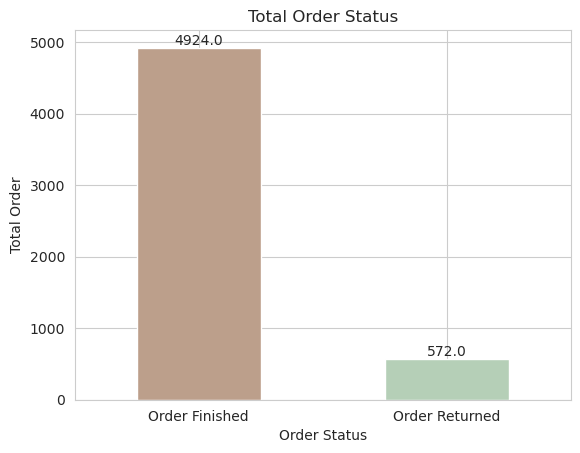

In [12]:
order_status = origin["order_status"].value_counts()

title = "Total Order Status"

barplot(order_status, title=title, xlabel="Order Status", ylabel="Total Order")

In [13]:
table = origin[origin["order_status"] == "Order Finished"]

total_sales = table["sales"].sum()

total_sales

17267992632

In [14]:
total_sales_all = origin["sales"].sum()

sales_diff = 1 - (total_sales / total_sales_all)

sales_diff = round(sales_diff * 100, 5)

sales_diff

10.93414

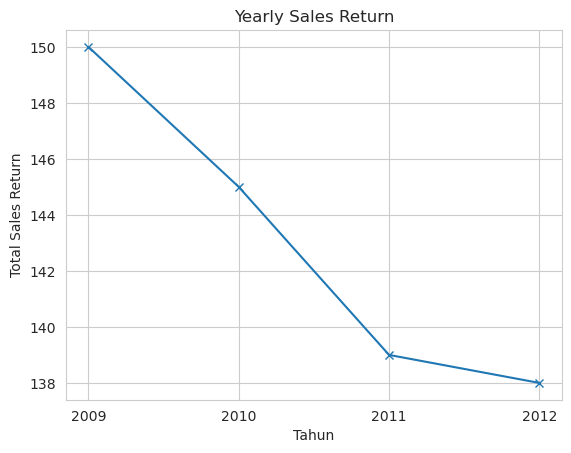

In [15]:
notsales = origin[origin["order_status"] != "Order Finished"]

tahun = notsales.order_date.dt.year

notsales = notsales.groupby(tahun).order_status.count()

title = "Yearly Sales Return"

lineplot(notsales, marker="x", xlabel="Tahun", ylabel="Total Sales Return", title=title)

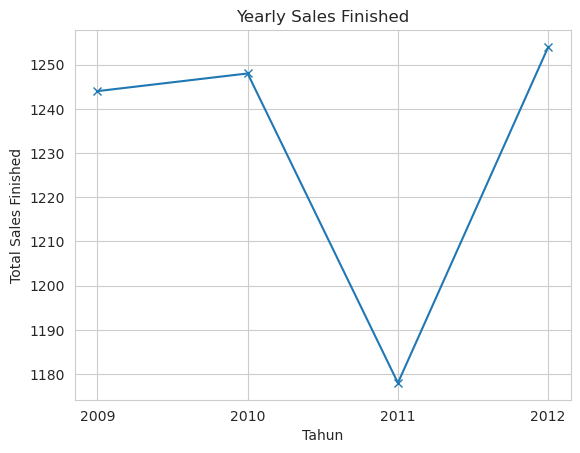

In [16]:
tahun = table.order_date.dt.year

transaction = table.groupby(tahun).order_status.count()

title = "Yearly Sales Finished"

lineplot(transaction, marker="x", xlabel="Tahun", ylabel="Total Sales Finished", title=title)